In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


In [5]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mhc_diversity/dataframe.csv',
                index_col=0)

In [8]:
passengerI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.passenger.class_i.csv',
                     index_col=0)
passengerII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.passenger.class_ii.csv',
                     index_col=0)
df_passI = pd.DataFrame(mean(passengerI < 0.5, axis=1))
df_passI.columns = ['passenger_coverageI']
df_passII = pd.DataFrame(mean(passengerII < 2, axis=1))
df_passII.columns = ['passenger_coverageII']
df_pass = pd.merge(df_passI, df_passII, left_index=True, right_index=True)

In [20]:
df_pass.head()

,passenger_coverageI,passenger_coverageII
TCGA-DH-A7UV,0.180921,0.078947
TCGA-DH-A7UT,0.177632,0.098684
TCGA-DH-A7UU,0.163377,0.084430
TCGA-DH-A7UR,0.157895,0.089912
TCGA-DH-A7US,0.179825,0.093202


In [21]:
df = pd.merge(df, df_pass, left_index=True, right_index=True)

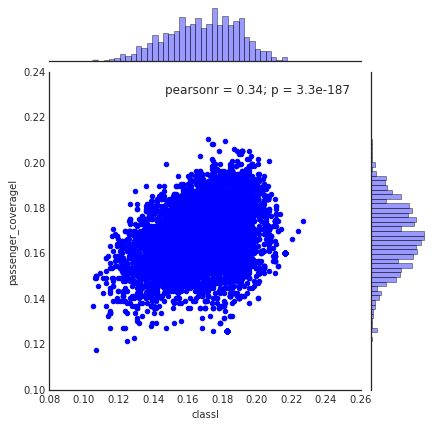

In [23]:
sns.jointplot(df.classI, df.passenger_coverageI)

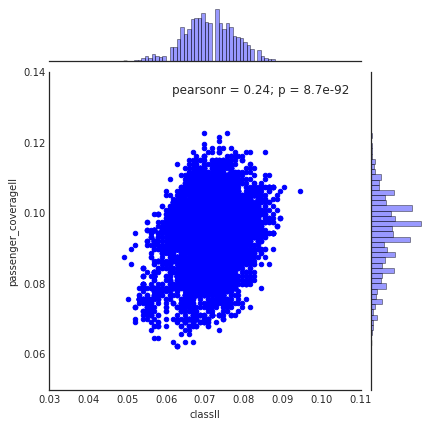

In [24]:
sns.jointplot(df.classII, df.passenger_coverageII)

In [73]:
tissue_order = list(df.dropna().Tissue.value_counts()[:20].index)
d, t_used = [], []
f, a = 0, 0
for tissue in tissue_order:
    difference = np.mean(df[(df.Tissue == tissue)&(df.classI_cat == 'low')].Age) - np.mean(df[(df.Tissue == tissue)&(df.classI_cat == 'high')].Age)
    d.append(difference)
    t_used.append(tissue)
    if difference < -2:
        f +=1
    elif difference > 2:
        a += 1
print f, a
tissues_sorted_by_difference = list(pd.DataFrame({'Difference': d, 'Tissue': t_used}).sort_values('Difference').Tissue)

8 0


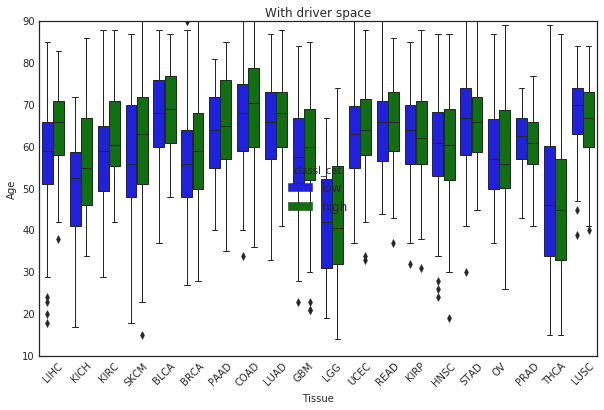

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tissue', y='Age', hue='classI_cat', data=df, order=tissues_sorted_by_difference,
            hue_order=['low','high'])
plt.xticks(rotation=45)
plt.title('With driver space')

In [59]:
def assign_categoryI(x):
    if x < df.passenger_coverage.dropna().quantile(L):
        return 'low'
    elif x > df.passenger_coverage.dropna().quantile(H):
        return 'high'
    else:
        return 'other'

In [60]:
L, H = 0.25, 0.75
df['pass_cat'] = df.passenger_coverage.apply(assign_categoryI)

In [62]:
tissue_order = list(df.dropna().Tissue.value_counts()[:20].index)
d, t_used = [], []
f, a = 0, 0
for tissue in tissue_order:
    difference = np.mean(df[(df.Tissue == tissue)&(df.pass_cat == 'low')].Age) - np.mean(df[(df.Tissue == tissue)&(df.pass_cat == 'high')].Age)
    d.append(difference)
    t_used.append(tissue)
    if difference < -2:
        f +=1
    elif difference > 2:
        a += 1
print f, a
tissues_sorted_by_difference = list(pd.DataFrame({'Difference': d, 'Tissue': t_used}).sort_values('Difference').Tissue)

5 2


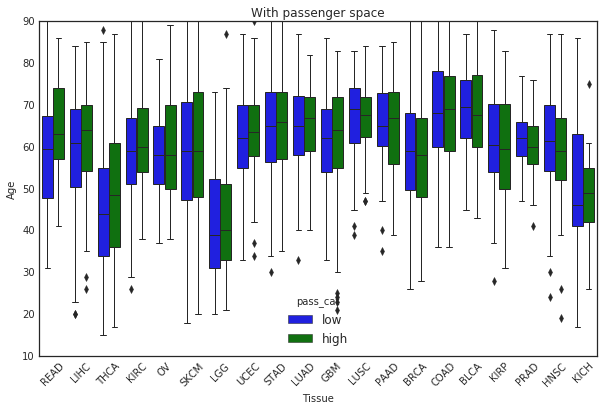

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tissue', y='Age', hue='pass_cat', data=df, order=tissues_sorted_by_difference,
            hue_order=['low','high'])
plt.xticks(rotation=45)
plt.title('With passenger space')